This notebook contains exercises related to Capstone Project 1.

Instacart data structure:
   - orders: list of all orders in the dataset. 1 row per order, includes day of the week and time of the day;
   - order_products train: which products (product_id) were ordered; in which order products were added to the cart, and if the product is re-order (1) or not (0);
   - contain the names of products with their corresponding product_id;
   - the structure is the same as order_product_train.csv;
   - aisles contains the aisles;
   - departments: contains the department names.

In [0]:
# FOR RUN ONLINE ONLY CELLS - UPLOAD FILES

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving instacart_prior.zip to instacart_prior.zip
User uploaded file "instacart_prior.zip" with length 164686327 bytes


In [8]:
import zipfile
with zipfile.ZipFile('instacart_prior.zip', 'r') as zip_ref:
  zip_ref.extractall()
  !ls

aisles.csv	 instacart_orders.zip  order_products_prior.csv  sample_data
departments.csv  instacart_prior.zip   products.csv


In [9]:
with zipfile.ZipFile('instacart_orders.zip', 'r') as zip_ref:
  zip_ref.extractall()
  !ls

aisles.csv	 instacart_orders.zip  order_products_prior.csv  products.csv
departments.csv  instacart_prior.zip   orders.csv		 sample_data


In [0]:
# We import the needed packages.
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import csv

In [0]:
# Strings to replace names of files run in online environment.
str_isles = 'aisles.csv'
str_dept = 'departments.csv'
str_prod = 'products.csv'
str_prod_train = 'order_products_train.csv'
str_prod_prior = 'order_products_prior.csv'
str_orders = 'orders.csv'

In [0]:
# Strings for local machine runs
str_isles = 'data/aisles.csv'
str_dept = 'data/departments.csv'
str_prod = 'data/products.csv'
str_prod_train = 'data/order_products_train.csv'
str_prod_prior = 'data/order_products_prior.csv'
str_orders = 'data/orders.csv'

For the isles frame, we change these into categories.

In [12]:
fr_isles = pd.read_csv(str_isles, index_col='aisle_id')
fr_isles['aisle'].astype('category')
fr_isles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1 to 134
Data columns (total 1 columns):
aisle    134 non-null object
dtypes: object(1)
memory usage: 2.1+ KB


We change the type of the department data to category.

In [13]:
fr_dept = pd.read_csv(str_dept, index_col='department_id')
fr_dept.department.astype('category')
fr_dept.head()

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [14]:

fr_prod = pd.read_csv(str_prod, index_col='product_id')
fr_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 1 to 49688
Data columns (total 3 columns):
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [15]:
# File not needed every time.
fr_p_train = pd.read_csv(str_prod_train, index_col='order_id')
fr_p_train.info()

FileNotFoundError: ignored

In [22]:
fp_p_read = pd.read_csv(str_prod_prior)
fp_p_prior = pd.DataFrame(fp_p_read)
fp_p_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


We change eval_set to category. The column has only three values.

In [17]:
fp_orders = pd.read_csv(str_orders, index_col='order_id')
fp_orders.eval_set.astype('category')
fp_orders.head()


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,NaN
2398795,1,prior,2,3,7,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,7,29.0
431534,1,prior,5,4,15,28.0


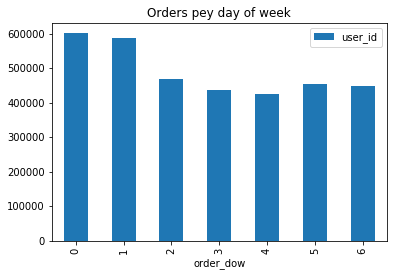

In [18]:
fp_groupped = fp_orders.groupby('order_dow').count().plot(kind='bar',y='user_id', title='Orders pey day of week')



We check to see data in hourly categories.

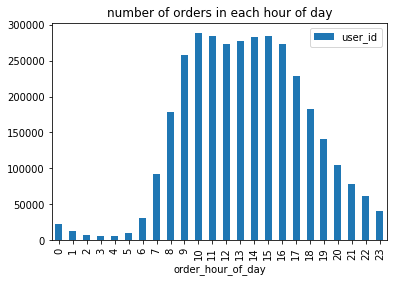

In [19]:
#graphing dayly activities per hour.
fp_orders.groupby('order_hour_of_day').count().plot(kind='bar', y='user_id', title='number of orders in each hour of day')

 We visualize data for inspection.
 
 We see that all orders for 30 days or more are aggregated into a single column.

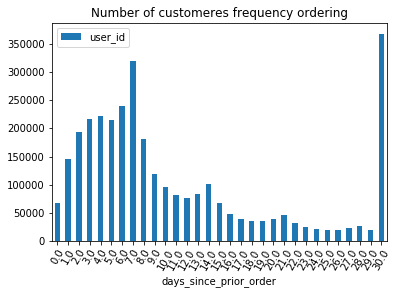

In [20]:
#grouping ordres according to days since prior order
fp_orders.groupby('days_since_prior_order').count().plot(kind='bar', rot=60
                                                         , y='user_id', title='Number of customeres frequency ordering')

We cannot work on pattern where the days are 30 or more, because all orders are aggregated. We are separating these orders from set.

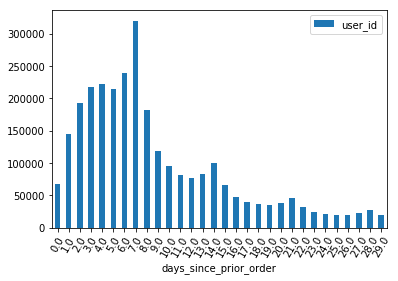

In [21]:
# dropping all observation where days since prior order is 30.
fp_orders_29 = fp_orders.loc[fp_orders['days_since_prior_order'] < 30]
fp_orders_30 = fp_orders.loc[fp_orders['days_since_prior_order']>=30]
fp_orders_29.groupby('days_since_prior_order').count().plot(kind='bar',rot=60, y='user_id')

We save orders in two separate files for further processing: orders_29.csv and orders_30.csv. 

The first file contains all data for orders that are reordes 29 days or less after a prior order. 

The other file contains all orders that are 30 days or more after the previous order.

In [0]:
# saving the separated data in two files for processing
# orders_29.csv and orders_30.csv
fp_orders_29.to_csv('orders_29.csv')
fp_orders_30.to_csv('orders_30.csv')


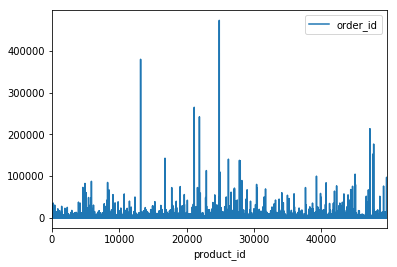

In [24]:
# how many products are in each order?
fp_p_prior.groupby('product_id').count().plot(y='order_id')